## <font color=red>匯入模組
    
-----
   


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 讀取CSV
df = pd.read_csv("heart disease.csv")
col_map = {'Age':'年齡','Sex':'性別','ChestPainType':'心絞痛類型','RestingBP':'靜息收縮壓'
            ,'Cholesterol':'血清膽固醇','FastingBS':'空腹血糖','RestingECG':'靜息心電圖'
            ,'MaxHR':'最大心跳速率','ExerciseAngina':'運動誘發的心絞痛','Oldpeak':'ST段抑制'
            ,'ST_Slope':'運動高峰心電圖','HeartDisease':'是否有心臟病'}
df_rename=df.rename(columns=col_map)
Dummies_DF = pd.get_dummies(df)

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## <font color=red>各欄位含意
-----
1. age：年齡

2. sex：性別 
	M=male  
	F=female

3. ChestPainType：胸痛型別
	0.ASY：無症狀。
	1.NAP：非心絞痛。
	2.ATA：非典型心絞痛。
	3.TA：典型心絞痛。

4. RestingBP：靜息收縮壓

5. Cholesterol：血清膽固醇

6. FastingBS ： 空腹血糖 >120mg/dl
	1=true
	0=false

7. RestingECG 靜息心電圖
	0.Normal：正常。
	1.LVH：left ventricular hypertrophy 左心室肥大。
	2.ST：ST-T wave abnormality ST-T波異常(不懂)。

8. MaxHR 最大心跳速率

9. ExerciseAngina 運動誘發的心絞痛
	Y
	N

10. Oldpeak 相對於休息的運動引起的ST值(ST值與心電圖上的位置有關)(看不懂QQ)

11. ST_Slope 運動高峰ST段的坡度 (google翻譯的，應該可以翻得更好)
	0.Up：向上傾斜。
	1.Flat：持平。
	2.Down：向下傾斜。

12. target 是否患有心臟病
	0：無。
	1：有。


In [3]:
#檢視是否有缺失值
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## <font color=red>資料預處理--各個數據與心臟病之關聯
-----
1.分析[年齡]特徵與心臟病的關係
    

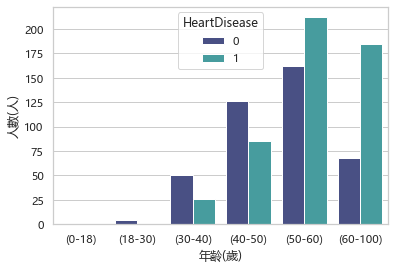

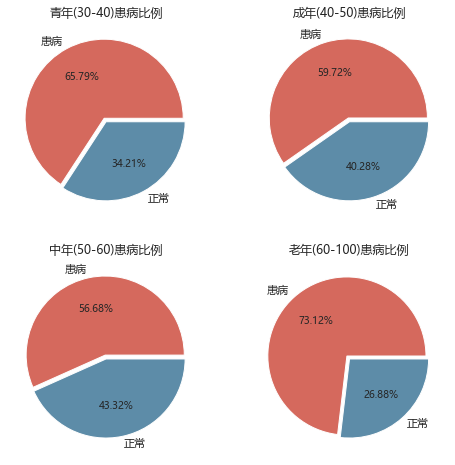

None


In [4]:
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft YaHei']})

# 建立DataFrame匯入分割後的年齡
Age_Df = pd.DataFrame()

# 用pd.cut() 分割年齡
Age_Df['age_range'] = pd.cut(x = df['Age'],
                                 bins = [0,18,30,40,50,60,100],
                                 include_lowest = True,right=False,
                                 labels = ['(0-18)','(18-30)','(30-40)'
                                           ,'(40-50)','(50-60)','(60-100)'])

# 將原來的HeartDisease合併到age_distDf中
Age_Df = pd.concat([Age_Df['age_range'],df['HeartDisease']],axis=1)

# 繪製柱狀圖，不同年齡層罹患心臟病的情況
sns.countplot(data=Age_Df,x = 'age_range',hue='HeartDisease',palette='mako')
plt.xlabel('年齡(歲)',fontsize=12)
plt.ylabel('人數(人)',fontsize=12)

# 繪製圓餅圖分析比例
plt.figure(figsize = (8,8))

# 青年(30-40)-youth患病比例
ax1 = plt.subplot(2,2,1)
youth = Age_Df[Age_Df['age_range']=='(30-40)']['HeartDisease'].value_counts()
plt.pie(youth,labels=['患病','正常'],explode=[0.05,0],colors=[ "#d5695d","#5d8ca8"],autopct='%.2f%%')
plt.title('青年(30-40)患病比例')

# 成年(40-50)-adult患病比例
ax2 = plt.subplot(2,2,2)
adult = Age_Df[Age_Df['age_range']=='(40-50)']['HeartDisease'].value_counts()
plt.pie(adult,labels=['患病','正常'],explode=[0.05,0],colors=[ "#d5695d","#5d8ca8"],autopct='%.2f%%')
plt.title('成年(40-50)患病比例')

# 中年(50-60)-middle患病比例
ax3 = plt.subplot(2,2,3)
middle = Age_Df[Age_Df['age_range']=='(50-60)']['HeartDisease'].value_counts()
plt.pie(middle,labels=['患病','正常'],explode=[0.05,0],colors=[ "#d5695d","#5d8ca8"],autopct='%.2f%%')
plt.title('中年(50-60)患病比例')

# 老年(60-100)-elderly患病比例
ax4 = plt.subplot(2,2,4)
elderly = Age_Df[Age_Df['age_range']=='(60-100)']['HeartDisease'].value_counts()
plt.pie(elderly,labels=['患病','正常'],explode=[0.05,0],colors=[ "#d5695d","#5d8ca8"],autopct='%.2f%%')
plt.title('老年(60-100)患病比例')

print(plt.show())

2.分析[性別]特徵與心臟病的關係

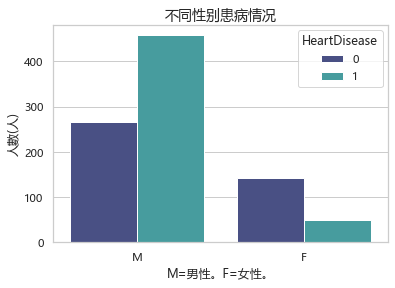

In [5]:
Sex_DF = df[['Sex','HeartDisease']]
sns.countplot(data = Sex_DF,x='Sex',hue='HeartDisease',palette='mako')
plt.title('不同性别患病情况',fontsize=14)
plt.xlabel('M=男性。F=女性。',fontsize=12)
plt.ylabel('人數(人)',fontsize=12)
plt.show()

3.分析[心絞痛類型]特徵與心臟病的關係

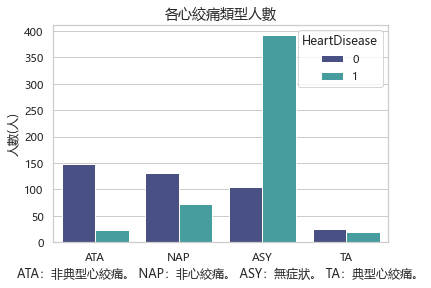

In [6]:
ChestPainType_DF = df[['ChestPainType','HeartDisease']]
sns.countplot(data = ChestPainType_DF,x='ChestPainType',hue='HeartDisease',palette='mako')
plt.title('各心絞痛類型人數',fontsize=14)
plt.xlabel('ATA：非典型心絞痛。 NAP：非心絞痛。 ASY：無症狀。 TA：典型心絞痛。',fontsize=12)
plt.ylabel('人數(人)',fontsize=12)
plt.show()

4.分析[靜息收縮壓]特徵與心臟病的關係，並將離群值修正

Num of outlier detected: 8
Proportion of outlier detected 0.008714596949891068
Upper bound: 187.93897652094344 
Lower bound: 76.85405180149664
449      0
109    190
592    190
759    192
241    200
365    200
399    200
732    200
Name: RestingBP, dtype: int64


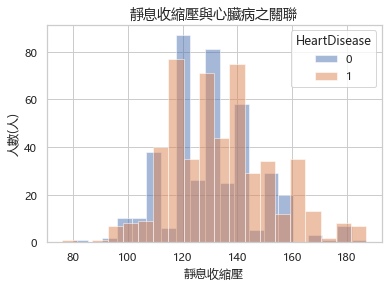

In [7]:
def outlier_detect_mean_std(data,col,threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    para = (Upper_fence, Lower_fence)   
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para
#呼叫涵式
index,para = outlier_detect_mean_std(df,'RestingBP',threshold=3)
#show +- 3個標準差之界線
print('Upper bound:',para[0],'\nLower bound:',para[1])
#show 出離群值
print(df.loc[index,'RestingBP'].sort_values())


def outlier_detect_arbitrary(df,col,upper_fence,lower_fence):
    
    para = (upper_fence, lower_fence)
    tmp = pd.concat([df[col]>upper_fence,df[col]<lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)    
    return outlier_index, para

df.loc[index,'RestingBP'].sort_values()

def windsorization(df,col,para,strategy='both'):
    
    df_copy = df.copy(deep=True)  
    if strategy == 'both':
        df_copy.loc[df_copy[col]>para[0],col] = para[0]
        df_copy.loc[df_copy[col]<para[1],col] = para[1]
    elif strategy == 'top':
        df_copy.loc[df_copy[col]>para[0],col] = para[0]
    elif strategy == 'bottom':
        df_copy.loc[df_copy[col]<para[1],col] = para[1]  
    return df_copy


index,para = outlier_detect_arbitrary(df,'RestingBP',187,76)
df = windsorization(df,'RestingBP',para,strategy='both')

plt.hist(df.loc[df['HeartDisease']==0,'RestingBP'], bins=20, alpha=0.5, label='0')
plt.hist(df.loc[df['HeartDisease']==1,'RestingBP'], bins=20, alpha=0.5, label='1')
plt.title('靜息收縮壓與心臟病之關聯',fontsize=14)
plt.xlabel('靜息收縮壓',fontsize=12)
plt.ylabel('人數(人)',fontsize=12)
plt.legend(title='HeartDisease')




5.分析[血清膽固醇]特徵與心臟病的關係，並將為0的值帶入為平均值。

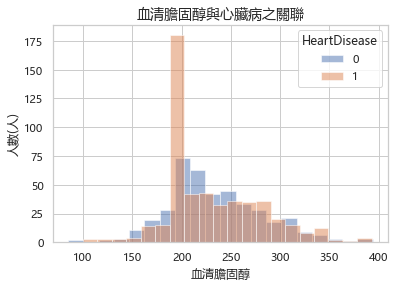

In [8]:
def impute_outlier_with_avg(df,col,outlier_index,strategy='mean'):    
    data_copy = df.copy(deep=True)
    data_copy.loc[outlier_index,col] = data_copy[col].mean()
    return data_copy

index,para = outlier_detect_arbitrary(df,'Cholesterol',400,5)

df = impute_outlier_with_avg(df,'Cholesterol',index,strategy='mean')

plt.hist(df.loc[df['HeartDisease']==0,'Cholesterol'], bins=20, alpha=0.5, label='0')
plt.hist(df.loc[df['HeartDisease']==1,'Cholesterol'], bins=20, alpha=0.5, label='1')
plt.title('血清膽固醇與心臟病之關聯',fontsize=14)
plt.xlabel('血清膽固醇',fontsize=12)
plt.ylabel('人數(人)',fontsize=12)
plt.legend(title='HeartDisease')

6.分析[空腹血糖]特徵與心臟病的關係

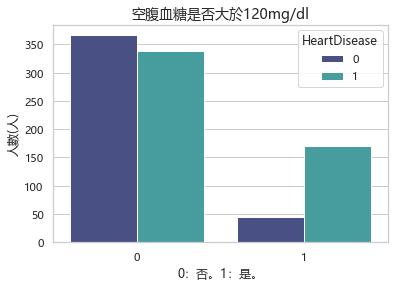

In [9]:
FastingBS_DF = df[['FastingBS','HeartDisease']]
sns.countplot(data = FastingBS_DF,x='FastingBS',hue='HeartDisease',palette='mako')
plt.title('空腹血糖是否大於120mg/dl',fontsize=14)
plt.xlabel('0：否。1：是。',fontsize=12)
plt.ylabel('人數(人)',fontsize=12)
plt.show()

7.分析[靜息心電圖]特徵與心臟病的關係

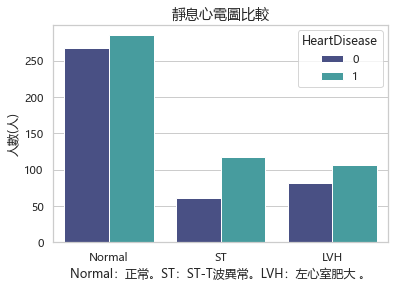

In [10]:
RestingECG_DF = df[['RestingECG','HeartDisease']]
sns.countplot(data = RestingECG_DF,x='RestingECG',hue='HeartDisease',palette='mako')
plt.title('靜息心電圖比較',fontsize=14)
plt.xlabel('Normal：正常。ST：ST-T波異常。LVH：左心室肥大 。',fontsize=12)
plt.ylabel('人數(人)',fontsize=12)
plt.show()

8.分析[最大心跳速率]特徵與心臟病的關係

C:\Users\A515\AppData\Local\Temp\ipykernel_19024\4035259688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MaxHR_DF['age_range'] = pd.cut(df['Age'],bins=[0,18,30,40,50,60,100],


   MaxHR  HeartDisease    age_range
0    172             0  成年\n(40-50)
1    156             1  成年\n(40-50)
2     98             0  青年\n(30-40)
3    108             1  成年\n(40-50)
4    122             0  中年\n(50-60)


C:\Users\A515\anaconda3\envs\heart\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


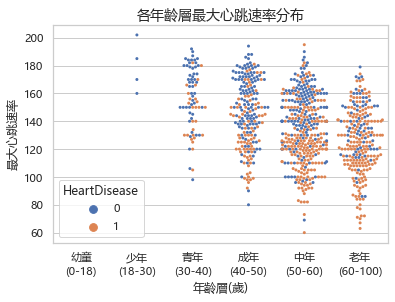

None


In [11]:
MaxHR_DF = df[['MaxHR','HeartDisease']]
MaxHR_DF['age_range'] = pd.cut(df['Age'],bins=[0,18,30,40,50,60,100],
                           labels=['幼童\n(0-18)','少年\n(18-30)','青年\n(30-40)'
                                     ,'成年\n(40-50)','中年\n(50-60)','老年\n(60-100)'],
                            include_lowest=True,right=False)
print(MaxHR_DF.head())

# 繪製分類散點圖，得知隨著年齡增加，最大心率下降也會間接影響罹患機率
sns.swarmplot(data=MaxHR_DF,x='age_range',y='MaxHR',hue='HeartDisease', size=3)
plt.title('各年齡層最大心跳速率分布',fontsize=14)
plt.xlabel('年齡層(歲)', fontsize=12)
plt.ylabel('最大心跳速率',fontsize=12)
print(plt.show())

9.分析[運動誘發的心絞痛]特徵與心臟病的關係

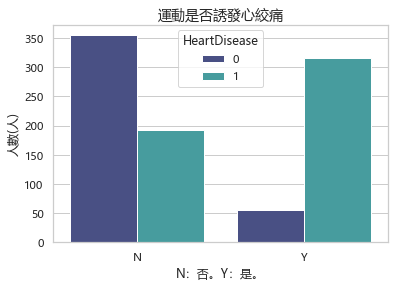

In [12]:
ExerciseAngina_DF = df[['ExerciseAngina','HeartDisease']]
sns.countplot(data = ExerciseAngina_DF,x='ExerciseAngina',hue='HeartDisease',palette='mako')
plt.title('運動是否誘發心絞痛',fontsize=14)
plt.xlabel('N：否。Y：是。',fontsize=12)
plt.ylabel('人數(人)',fontsize=12)
plt.show()

10.分析[相對於休息的運動引起的ST值]特徵與心臟病的關係

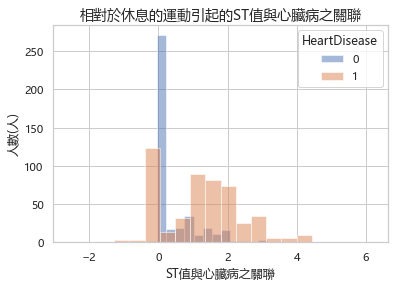

In [13]:
plt.hist(df.loc[df['HeartDisease']==0,'Oldpeak'], bins=20, alpha=0.5, label='0')
plt.hist(df.loc[df['HeartDisease']==1,'Oldpeak'], bins=20, alpha=0.5, label='1')
plt.title('相對於休息的運動引起的ST值與心臟病之關聯',fontsize=14)
plt.xlabel('ST值與心臟病之關聯')
plt.ylabel('人數(人)')
plt.legend(title='HeartDisease')

11.分析[運動高峰心電圖]特徵與心臟病的關係

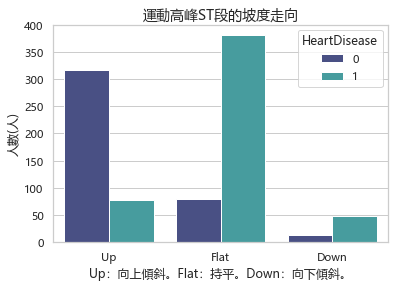

In [14]:
ST_Slope_DF = df[['ST_Slope','HeartDisease']]
sns.countplot(data = ST_Slope_DF,x='ST_Slope',hue='HeartDisease',palette='mako')
plt.title('運動高峰ST段的坡度走向',fontsize=14)
plt.xlabel('Up：向上傾斜。Flat：持平。Down：向下傾斜。',fontsize=12)
plt.ylabel('人數(人)',fontsize=12)
plt.show()

## <font color=red>特徵篩選
    
    
-----
   


<AxesSubplot:title={'center':'各項特徵與罹患心臟病的相關性'}>

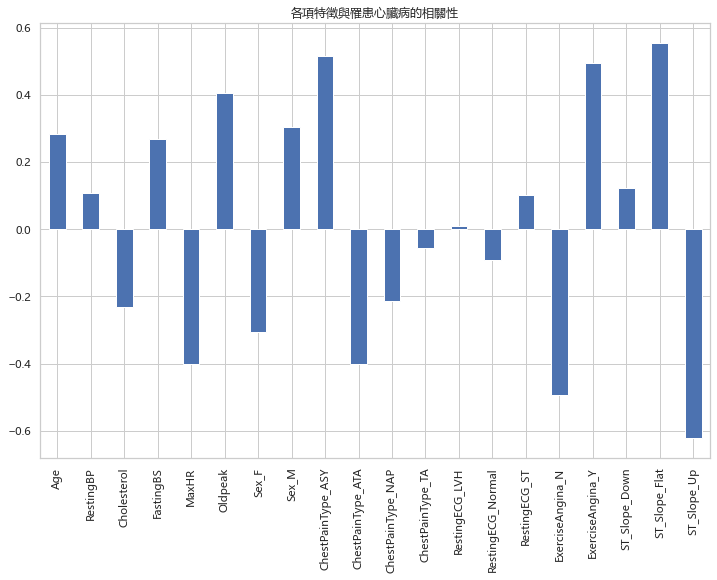

In [15]:
Dummies_DF.drop('HeartDisease', axis=1).corrwith(Dummies_DF.HeartDisease).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="各項特徵與罹患心臟病的相關性")


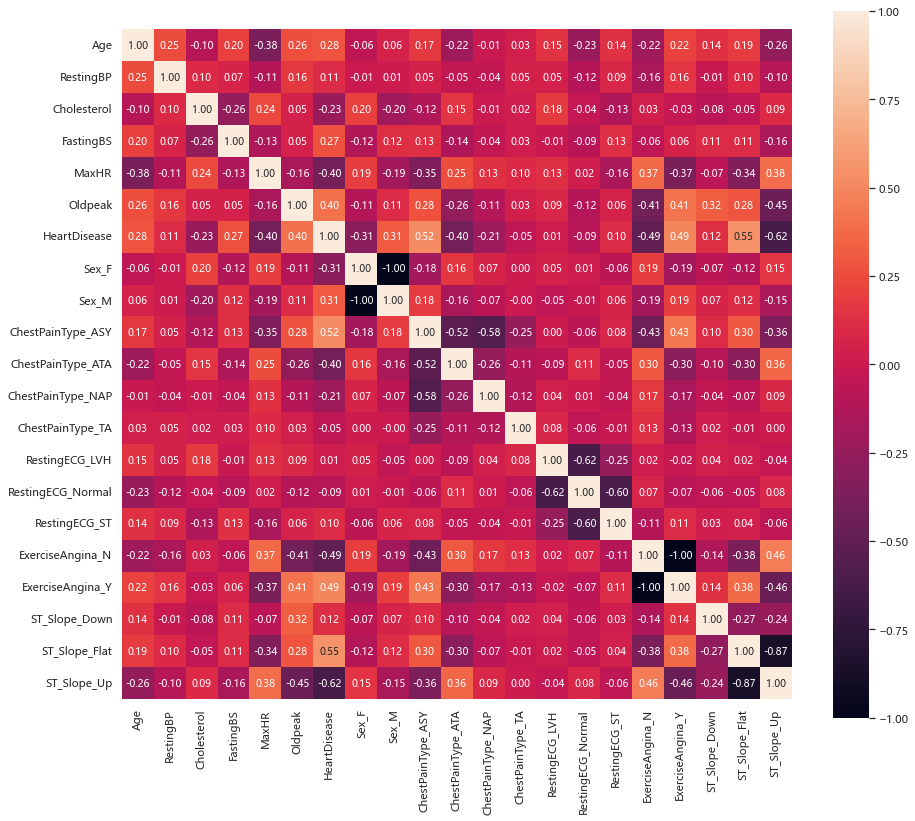

None


In [16]:

plt.figure(figsize=(15,13))
corr = Dummies_DF.corr()
sns.heatmap(data=corr,annot=True, square=True,fmt='.2f')
print(plt.show())
#plt.savefig('get dummies.jpg',format='jpg',bbox_inches = "tight")


手動圈出需要的特徵
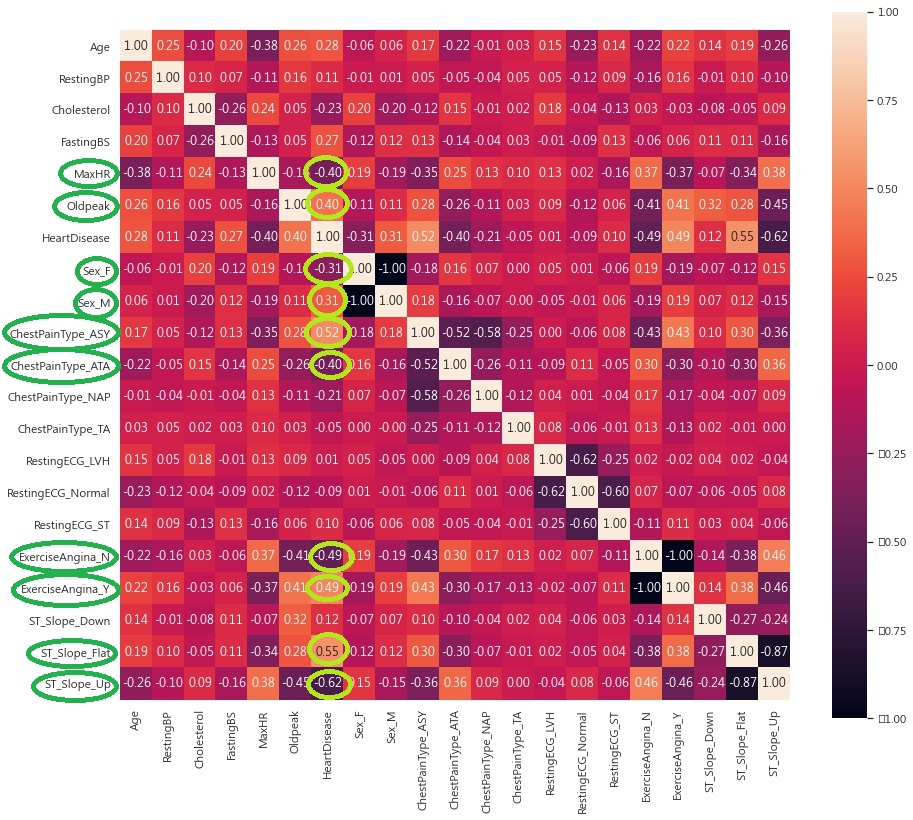

## <font color=red>將數據集分為訓練用跟測試用
-----

In [64]:

#選取全特徵

X = Dummies_DF.drop(columns=['HeartDisease'])

y = Dummies_DF['HeartDisease'].values  
X_train, X_test, y_train, y_test =  train_test_split(X, y,
                     test_size=0.2,random_state = 1)


#0.3
'''
X = Dummies_DF[['MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP',
               'ExerciseAngina_N','ExerciseAngina_Y','ST_Slope_Up','ST_Slope_Flat']].values  
y = Dummies_DF['HeartDisease'].values  
X_train, X_test, y_train, y_test =  train_test_split(X, y,
                     test_size=0.2,random_state = 1)
'''
#0.2
'''
X = Dummies_DF[['Age','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ASY','ChestPainType_ATA',
               'ExerciseAngina_N','ExerciseAngina_Y','ST_Slope_Up','ST_Slope_Flat']].values  
y = Dummies_DF['HeartDisease'].values  
X_train, X_test, y_train, y_test =  train_test_split(X, y,
                     test_size=0.2,random_state = 1)
'''

"\nX = Dummies_DF[['Age','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ASY','ChestPainType_ATA',\n               'ExerciseAngina_N','ExerciseAngina_Y','ST_Slope_Up','ST_Slope_Flat']].values  \ny = Dummies_DF['HeartDisease'].values  \nX_train, X_test, y_train, y_test =  train_test_split(X, y,\n                     test_size=0.2,random_state = 1)\n"

## <font color=red>SVC
-----

In [18]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = SVC(kernel='rbf', C=1)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))

number of correct sample: 167
accuracy: 0.907608695652174
con_matrix: [[ 64  10]
 [  7 103]]


## <font color=red>決策樹
-----

In [72]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))

number of correct sample: 167
accuracy: 0.907608695652174
con_matrix: [[ 65   9]
 [  8 102]]


C:\Users\A515\anaconda3\envs\heart\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\A515\anaconda3\envs\heart\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## <font color=red>隨機森林
-----

In [74]:
regressor = RandomForestRegressor(n_estimators = 75,max_depth=4)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
y_pred=(y_pred>0.5)

y_test=list(y_test)
y_pred=list(y_pred)


pred_train=regressor.predict(X_train)
pred_train=(pred_train>0.5)

print("The accuracy for Random Forest Regressor= "+str(accuracy_score(y_train,pred_train)*100))

print("The Test accuracy for Random Forest Regressor= "+str(accuracy_score(y_test,y_pred)*100))


The accuracy for Random Forest Regressor= 90.19073569482289
The Test accuracy for Random Forest Regressor= 90.76086956521739


C:\Users\A515\anaconda3\envs\heart\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
